## KMEANS
Yahir Rivera Huerta

Aldo Parada

Jacob Valdenegro

Dilan Ocampo

Roberto Rillo


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns


In [2]:
df = pd.read_csv("Capacitados_vida_humana_mar.csv")
df = df.drop('ejercicio_fiscal', axis=1)
df = df.drop('nombre_curso', axis=1)
df = df.drop('clave_estado', axis=1)
df.head(10)



,entidad,numero_pescadores_capacitados
0,Baja California,64
1,Baja California,33
2,Chiapas,795
3,Guerrero,60
4,Guerrero,132
5,Guerrero,532
6,Jalisco,79
7,Jalisco,46
8,Jalisco,124
9,Jalisco,121


In [3]:
x = df.iloc[:,[1]]
scaler = StandardScaler()
X_norm = scaler.fit_transform(x)

X_norm = pd.DataFrame(X_norm, columns=[1])


Text(0.5, 1.0, 'Silhouette Score')

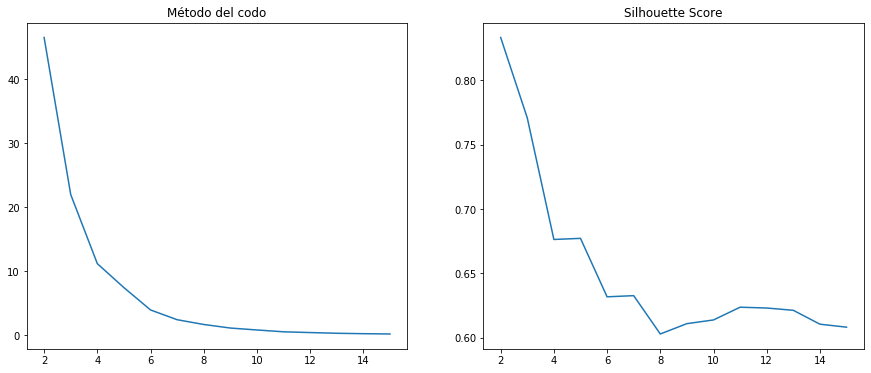

In [4]:
kmax   = 16
grupos = range(2, kmax)
wcss   = []
sil_score = []


for k in grupos:
    model = KMeans(n_clusters=k, random_state = 47)


    clusters = model.fit_predict(X_norm)


    wcss.append(model.inertia_)


    sil_score.append(silhouette_score(X_norm, clusters))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))


axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')


axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')


In [5]:
model = KMeans(n_clusters=4, random_state=47)
clusters = model.fit_predict(X_norm)

df['Grupo'] = clusters.astype('str')
df.head()

,entidad,numero_pescadores_capacitados,Grupo
0,Baja California,64,0
1,Baja California,33,0
2,Chiapas,795,2
3,Guerrero,60,0
4,Guerrero,132,0


Text(0.5, 1.05, '4 grupos de pescadores')

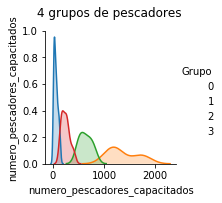

In [9]:
sns.pairplot(data=df, hue='Grupo', palette='tab10')
plt.suptitle('4 grupos de pescadores', y=1.05)